In [ ]:
%pip install numpy pandas matplotlib seaborn scikit-learn


=== Wine Dataset ===
Shape: (178, 14)
First 5 rows:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/

C:\Users\murat\AppData\Local\Temp\ipykernel_9056\3294650186.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


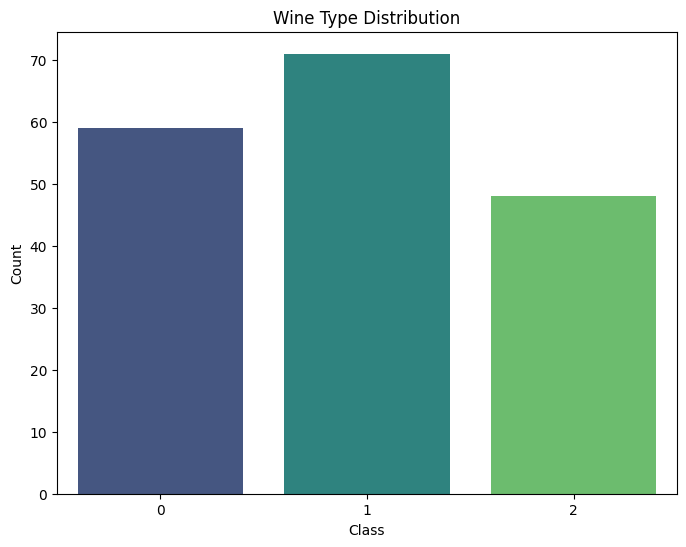

C:\Users\murat\AppData\Local\Temp\ipykernel_9056\3294650186.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


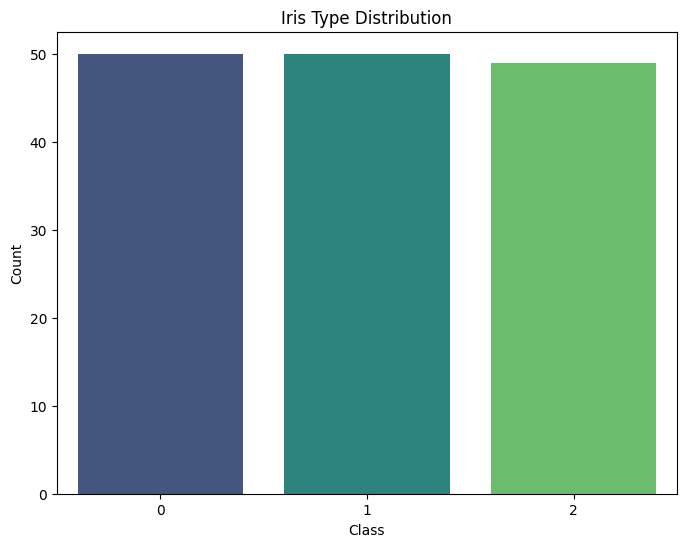

c:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Wine Classification Accuracy: 0.97
Iris Classification Accuracy: 1.00


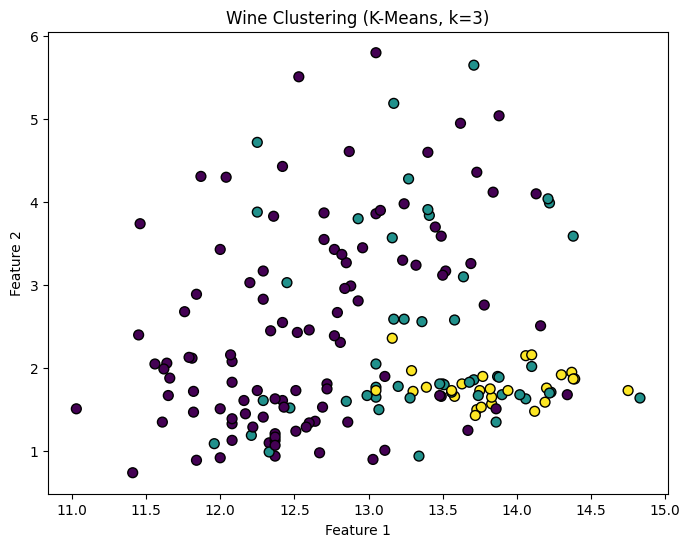

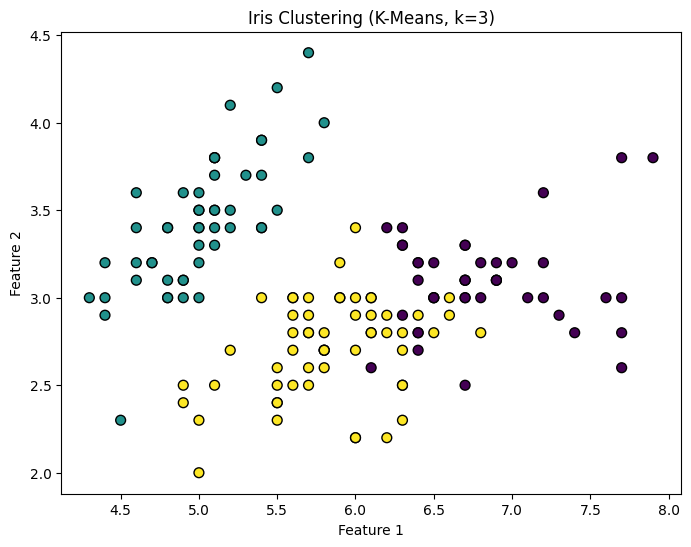

Wine Perceptron Accuracy: 1.00
Iris Perceptron Accuracy: 0.90


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

wine = datasets.load_wine()
iris = datasets.load_iris()

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

def analyze_dataset(df, name):
    print(f"=== {name} Dataset ===")
    print("Shape:", df.shape)
    print("First 5 rows:\n", df.head())
    print("Last 5 rows:\n", df.tail())
    print("Number of Records:", len(df))
    print("Dataset Info:")
    df.info()
    print("Missing Values:\n", df.isnull().sum())
    
    df.fillna(df.mean(), inplace=True)
    
    print("After filling missing values, Missing Values:\n", df.isnull().sum())
    print("Duplicate Records:", df.duplicated().sum())
    
    df.drop_duplicates(inplace=True)
    print(f"After removing duplicates: {df.shape}\n")

analyze_dataset(wine_df, "Wine")

analyze_dataset(iris_df, "Iris")

def plot_distribution(df, name):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='target', data=df, palette='viridis')
    plt.title(f"{name} Type Distribution")
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

plot_distribution(wine_df, "Wine")
plot_distribution(iris_df, "Iris")

def classify_data(df, name):
    X = df.drop(columns=['target'])
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    classifier = LogisticRegression(max_iter=1000, random_state=42)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Classification Accuracy: {accuracy:.2f}")
    return X_train, X_test, y_train, y_test

X_train_wine, X_test_wine, y_train_wine, y_test_wine = classify_data(wine_df, "Wine")
X_train_iris, X_test_iris, y_train_iris, y_test_iris = classify_data(iris_df, "Iris")

def cluster_data(df, name, n_clusters):
    X = df.drop(columns=['target'])
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(X)
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['cluster'], cmap='viridis', edgecolor='k', s=50)
    plt.title(f"{name} Clustering (K-Means, k={n_clusters})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

cluster_data(wine_df, "Wine", n_clusters=3)
cluster_data(iris_df, "Iris", n_clusters=3)

def perceptron_model(X_train, X_test, y_train, y_test, name):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
    perceptron.fit(X_train_scaled, y_train)
    y_pred = perceptron.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Perceptron Accuracy: {accuracy:.2f}")

perceptron_model(X_train_wine, X_test_wine, y_train_wine, y_test_wine, "Wine")
perceptron_model(X_train_iris, X_test_iris, y_train_iris, y_test_iris, "Iris")
